In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/'
import cv2

Mounted at /content/drive


In [ ]:
import cv2

img = cv2.imread(data_folder+'0/TCGA-A6-4105.jpg')

In [ ]:
img[0:224,0:224,:]

array([[[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       ...,

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]]

In [ ]:
count, bins_count = np.histogram(img[2000:2224,2000:2224,:], bins=256)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

NameError: ignored

In [ ]:
cdf[200]

0.6686264349489794

In [ ]:
plt.imshow(img[2000:2224,2000:2224,:])

NameError: ignored

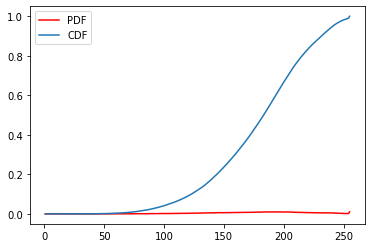

In [ ]:
#import matplotlib.pyplot as plt

# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

In [ ]:
import numpy as np

In [ ]:
>>> from collections import Counter

>>> recounted = Counter(a)

DisabledFunctionError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/'
import cv2
import glob
import numpy as np
import itertools


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##### inception model

from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
model=InceptionV3()
#model.summary()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

96112376/96112376 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
all_image_path=glob.glob(data_folder+'0/**.jpg')
for image_path in all_image_path :
  image_name=image_path.split("/")[-1].split(".")[0]
  img_arr = np.array(cv2.imread(image_path))
  dim_x,dim_y,_=img_arr.shape
  num_sub_fig=0
  sum_feature=[0]*2048
  print(image_name)
  for i in range(int(dim_x/299)):
    for j in range(int(dim_y/299)):
      sub_fig=img_arr[(i*299):(i*299+299),(j*299):(j*299+299),:]
      count, bins_count = np.histogram(sub_fig, bins=256)
      pdf = count / sum(count)
      cdf = np.cumsum(pdf)
      if cdf[200]>0.5:
        img_expanded=np.expand_dims(sub_fig, axis=0)
        image = preprocess_input(img_expanded)
        num_sub_fig+=1
        predicted_feature=model.predict(image)
        sum_feature=sum_feature+predicted_feature
  print(num_sub_fig)
  final_feature=sum_feature/num_sub_fig
  all_info=[image_name,num_sub_fig]+(final_feature[0].tolist())
  """  
  with open(data_folder+'network_result.txt', 'w') as f:
    f.writelines(all_info)
    f.write('\n')
  """
  with open(data_folder+'0_network_result.csv', 'ab') as file:
      np.savetxt(file, final_feature, delimiter="\t")

TCGA-A6-4105


NameError: ignored

In [ ]:
all_image_path=glob.glob(data_folder+'1/**.jpg')
all_image_path=='/content/drive/MyDrive/1/TCGA-CM-6161.jpg'
a=[item=='/content/drive/MyDrive/1/TCGA-RU-A8FL-.jpg' for item in all_image_path]
np.where(a)
#len(all_image_path)

(array([160]),)

In [ ]:
all_image_path=glob.glob(data_folder+'1/**.jpg')
all_image_path=all_image_path[161:]
for image_path in all_image_path :
  image_name=image_path.split("/")[-1].split(".")[0]
  img_arr = np.array(cv2.imread(image_path))
  dim_x,dim_y,_=img_arr.shape
  num_sub_fig=0
  sum_feature=[0]*2048
  print(image_name)
  for i in range(int(dim_x/299)):
    for j in range(int(dim_y/299)):
      sub_fig=img_arr[(i*299):(i*299+299),(j*299):(j*299+299),:]
      count, bins_count = np.histogram(sub_fig, bins=256)
      pdf = count / sum(count)
      cdf = np.cumsum(pdf)
      if cdf[200]>0.5:
        img_expanded=np.expand_dims(sub_fig, axis=0)
        num_sub_fig+=1
        image = preprocess_input(img_expanded)
        predicted_feature=model.predict(image)
        sum_feature=sum_feature+predicted_feature
  print(num_sub_fig)
  final_feature=sum_feature/num_sub_fig
  all_info=[image_name,num_sub_fig]+(final_feature[0].tolist())
  """  
  with open(data_folder+'network_result.txt', 'w') as f:
    f.writelines(all_info)
    f.write('\n')fhgjdfbyj86ik
  """
  with open(data_folder+'1_network_result.csv', 'ab') as file:
      np.savetxt(file, final_feature, delimiter="\t")

TCGA-SS-A7HO-
1/1 [==============================] - 0s 261ms/step
218


In [ ]:
image.max()

0.92941177

In [ ]:
from keras.applications.inception_v3 import preprocess_input

In [ ]:
import pandas as pd
file_0= pd.read_csv(data_folder+'0_network_result.csv',sep='\t',header=None)
file_1= pd.read_csv(data_folder+'1_network_result.csv',sep='\t',header=None)

In [ ]:
all_image_path=glob.glob(data_folder+'0/**.jpg')

images_name=[image_path.split("/")[-1].split(".")[0] for image_path in all_image_path]

In [ ]:
file_0.index=images_name
file_0

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
TCGA-A6-4105,0.268939,0.014623,0.300225,0.050221,0.469770,0.090624,0.454709,0.687237,0.417017,0.361348,...,1.488746,0.590034,1.319694,0.197483,0.147726,0.660664,0.462877,0.504551,0.986923,0.092705
TCGA-AA-3489,0.219151,0.164938,0.340485,0.253835,0.354587,0.161482,0.391998,0.473219,0.413958,0.581432,...,0.688915,0.374997,0.576735,0.284248,0.108749,0.438259,0.141485,0.415186,0.567955,0.222081
TCGA-AD-6889,0.240339,0.105579,0.145219,0.087377,0.311785,0.264882,0.499815,0.982720,0.257167,0.300479,...,1.124920,0.184243,1.424779,0.756550,0.073630,0.313787,0.161067,0.525547,0.809572,0.301631
TCGA-AD-6901,0.347558,0.169619,0.178393,0.278869,0.199613,0.243541,0.531744,0.491732,0.443404,0.231685,...,1.179229,0.352880,0.760995,0.299616,0.072293,0.291716,0.202815,0.205495,0.370364,0.658418
TCGA-AD-6888,0.290880,0.071988,0.090789,0.062305,0.236903,0.191983,0.580896,0.994538,0.323461,0.406471,...,1.136420,0.227058,1.564904,0.468533,0.057491,0.205984,0.109348,0.590053,0.726121,0.360980
TCGA-AZ-4323,0.046961,0.044825,0.236118,0.049668,0.418519,0.182622,0.824259,2.937738,0.125890,0.363449,...,1.582138,0.050989,1.635065,0.638393,0.073942,0.650246,0.455116,0.481201,0.748158,0.015300
TCGA-AZ-5403,0.082720,0.022255,0.078966,0.069963,0.177767,0.260643,0.677131,0.963243,0.248800,0.216303,...,1.072903,0.250406,1.127982,0.486450,0.030755,0.157046,0.080315,0.651862,0.239673,0.108998
TCGA-AZ-4616,0.074175,0.077862,0.243486,0.055135,0.229185,0.127399,0.821097,1.728424,0.078650,0.356429,...,1.184555,0.176215,1.726544,0.280151,0.036130,0.511963,0.260343,0.497708,0.597608,0.170806
TCGA-AZ-6605,0.126348,0.231512,0.150060,0.095012,0.248825,0.260278,0.682809,2.077642,0.213960,0.293735,...,0.880759,0.107207,1.196781,0.341775,0.056837,0.476272,0.238906,0.502163,0.713087,0.207991
TCGA-AZ-6599,0.287247,0.109482,0.220860,0.096141,0.215668,0.192613,0.563355,0.431780,0.594271,0.367027,...,0.919621,0.207327,0.838060,0.328885,0.123694,0.393845,0.205672,0.190339,0.723478,0.422455


In [ ]:
all_image_path=glob.glob(data_folder+'1/**.jpg')

images_name=[image_path.split("/")[-1].split(".")[0] for image_path in all_image_path]

In [ ]:
file_1.index=images_name
file_1

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
TCGA-A6-5659,0.164717,0.052360,0.126461,0.109147,0.117413,0.129656,0.779729,0.146170,0.230773,0.232623,...,0.382743,0.564255,0.383203,0.051990,0.028236,0.095419,0.097799,0.448834,0.310178,0.060483
TCGA-A6-5657,0.059603,0.075292,0.229136,0.098998,0.227598,0.077331,0.697898,2.111413,0.258694,0.588498,...,1.206116,0.126900,1.641574,0.267364,0.041170,0.250282,0.451297,0.327862,0.756462,0.067012
TCGA-A6-5661,0.215357,0.033012,0.163903,0.044577,0.452172,0.070179,0.403230,0.467887,0.633419,0.640225,...,0.637058,0.586153,1.483912,0.120389,0.095043,0.514899,0.934773,0.292000,0.713106,0.173522
TCGA-A6-5662,0.200619,0.063584,0.195528,0.068293,0.489948,0.312787,0.608486,1.721159,0.189076,0.180905,...,1.864430,0.120647,1.394810,0.985175,0.046753,0.258366,0.137561,0.612794,0.924956,0.416500
TCGA-A6-5666,0.089385,0.057864,0.187135,0.125509,0.145347,0.159044,0.551244,0.397631,0.341958,0.386040,...,0.601604,0.259665,0.550217,0.351512,0.063488,0.265107,0.183834,0.499594,0.381404,0.183613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-QG-A5YX-,0.237445,0.096266,0.155844,0.072725,0.319420,0.255273,0.709580,0.935011,0.284150,0.213511,...,1.077201,0.203613,1.146381,0.806604,0.073009,0.439219,0.198837,0.492958,1.008504,0.335332
TCGA-QG-A5Z2--,0.393245,0.073647,0.226195,0.100039,0.443099,0.240292,0.577481,0.742216,0.214917,0.277921,...,1.565465,0.228235,1.326523,0.920853,0.088474,0.375256,0.219337,0.706675,0.883315,0.402124
TCGA-QL-A97D--,0.125556,0.030888,0.290865,0.050724,0.152158,0.206883,0.832066,1.672277,0.144152,0.306190,...,0.910313,0.175123,1.786379,0.447964,0.080638,0.340622,0.205426,1.090260,0.904150,0.057018
TCGA-RU-A8FL-,0.262225,0.047016,0.125642,0.074161,0.160706,0.194126,0.618367,0.221011,0.198155,0.264641,...,0.989364,0.373577,1.223763,0.173285,0.033689,0.191042,0.131789,0.813229,0.471685,0.146174


In [ ]:
file_1.loc[:,"risk"]=[1]*file_1.shape[0]
file_0.loc[:,"risk"]=[0]*file_0.shape[0]

In [ ]:
all_images=pd.concat([file_1, file_0])
all_images.shape

(215, 2049)

In [ ]:
all_images.to_csv(data_folder+'all_images_dr_salimi.csv', index=True)

In [ ]:

all_images.loc[:, all_images.columns!='risk']

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
TCGA-A6-5659,0.164717,0.052360,0.126461,0.109147,0.117413,0.129656,0.779729,0.146170,0.230773,0.232623,...,0.382743,0.564255,0.383203,0.051990,0.028236,0.095419,0.097799,0.448834,0.310178,0.060483
TCGA-A6-5657,0.059603,0.075292,0.229136,0.098998,0.227598,0.077331,0.697898,2.111413,0.258694,0.588498,...,1.206116,0.126900,1.641574,0.267364,0.041170,0.250282,0.451297,0.327862,0.756462,0.067012
TCGA-A6-5661,0.215357,0.033012,0.163903,0.044577,0.452172,0.070179,0.403230,0.467887,0.633419,0.640225,...,0.637058,0.586153,1.483912,0.120389,0.095043,0.514899,0.934773,0.292000,0.713106,0.173522
TCGA-A6-5662,0.200619,0.063584,0.195528,0.068293,0.489948,0.312787,0.608486,1.721159,0.189076,0.180905,...,1.864430,0.120647,1.394810,0.985175,0.046753,0.258366,0.137561,0.612794,0.924956,0.416500
TCGA-A6-5666,0.089385,0.057864,0.187135,0.125509,0.145347,0.159044,0.551244,0.397631,0.341958,0.386040,...,0.601604,0.259665,0.550217,0.351512,0.063488,0.265107,0.183834,0.499594,0.381404,0.183613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-DM-A28C--,0.061395,0.053371,0.117349,0.094331,0.067484,0.117867,0.819302,0.417860,0.179890,0.276271,...,0.266332,0.377123,0.446685,0.070476,0.029027,0.086794,0.080463,0.519280,0.230614,0.058558
TCGA-T9-A92H-,0.108943,0.039504,0.128161,0.077841,0.195043,0.188864,0.784106,0.949439,0.156182,0.261067,...,0.957264,0.229571,1.108520,0.327550,0.073814,0.244212,0.177190,1.028849,0.691363,0.099173
TCGA-T9-A92H--,0.130505,0.040193,0.088133,0.071874,0.187538,0.210229,0.793931,0.709637,0.252699,0.264864,...,0.880734,0.305901,1.062795,0.281120,0.074593,0.188340,0.159757,0.811697,0.675363,0.138601
TCGA-NH-A6GA-,0.206499,0.078844,0.136465,0.075009,0.323170,0.120890,0.675837,0.647098,0.226055,0.386046,...,0.819288,0.367604,0.611017,0.264867,0.202598,0.424106,0.140851,0.382416,0.720551,0.180838


In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(all_images.loc[:, all_images.columns!='risk'])

PCA(n_components=0.95)

In [ ]:
pcs_images=pca.transform(all_images.loc[:, all_images.columns!='risk'])

In [ ]:
df_pcs_images=pd.DataFrame(pcs_images)

In [ ]:
df_pcs_images.index=all_images.index
df_pcs_images.loc[:,"risk"]=all_images.loc[:,"risk"]

In [ ]:
df_pcs_images.to_csv(data_folder+'pcs_images_dr_salimi.csv', index=True)